In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading in the dataset with the first 1 million rows because my computer can not handle the entire dataset
df = pd.read_csv("../data/PS_20174392719_1491204439457_log.csv", nrows = 1000000)

In [4]:
Sample_df = df.sample(10000, random_state= 42)

In [5]:
Sample_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
987231,45,PAYMENT,79.86,C1048495139,21400.00,21320.14,M1649887119,0.00,0.00,0,0
79954,10,CASH_IN,285423.14,C1223059230,510.00,285933.14,C708232604,561.00,0.00,0,0
567130,23,CASH_IN,176371.13,C2047243429,2227768.61,2404139.74,C1614837211,2471996.98,2295625.85,0,0
500891,20,CASH_OUT,283759.53,C813860567,6231.00,0.00,C603023442,1397807.89,1681567.41,0,0
55399,9,CASH_OUT,262268.28,C204225557,104675.00,0.00,C426784026,76376.58,1674917.08,0,0


In [6]:
Sample_df.shape

(10000, 11)

In [7]:
Sample_df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
Sample_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.0
mean,25.094300,1.586565e+05,8.983152e+05,9.189477e+05,9.869380e+05,1.121496e+06,0.000600,0.0
std,12.675491,2.548734e+05,3.026306e+06,3.064025e+06,2.367840e+06,2.475063e+06,0.024489,0.0
min,1.000000,3.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,14.000000,1.266489e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,20.000000,7.887553e+04,1.606850e+04,0.000000e+00,1.336865e+05,2.219494e+05,0.000000,0.0
75%,38.000000,2.144294e+05,1.482152e+05,1.832283e+05,9.175736e+05,1.149247e+06,0.000000,0.0
max,45.000000,3.308794e+06,3.025940e+07,3.036536e+07,3.256872e+07,3.270934e+07,1.000000,0.0


In [9]:
df["isFraud"].value_counts()

isFraud
0    999465
1       535
Name: count, dtype: int64

From this, we can see that most cases are not fraud and only 535 cases out of 1 million are actually fraud

<Axes: xlabel='isFraud', ylabel='Count'>

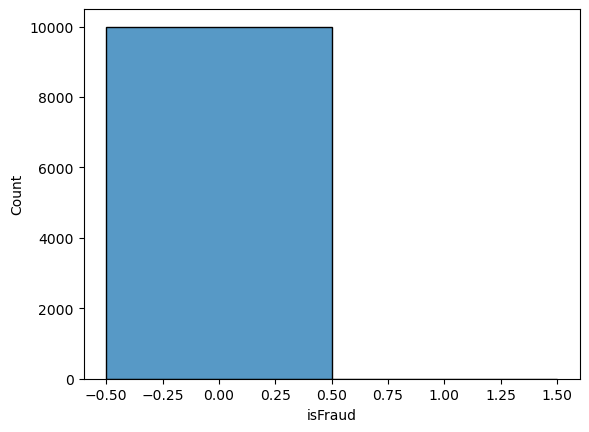

In [10]:
#First I chose to generate a visualization on the target, isFraud
sns.histplot(data=Sample_df, x="isFraud", discrete=True)


<Axes: xlabel='amount', ylabel='Count'>

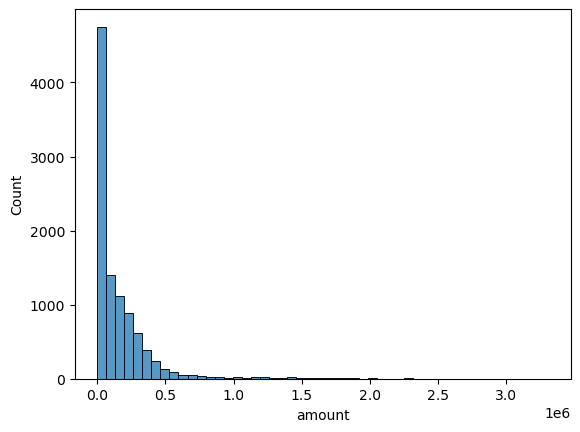

In [11]:
sns.histplot(Sample_df["amount"],bins = 50)

<Axes: xlabel='step', ylabel='Count'>

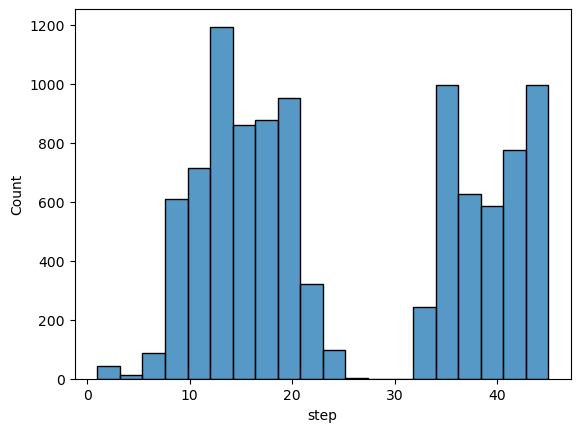

In [12]:
sns.histplot(data=Sample_df, x="step")

<Axes: xlabel='type', ylabel='Count'>

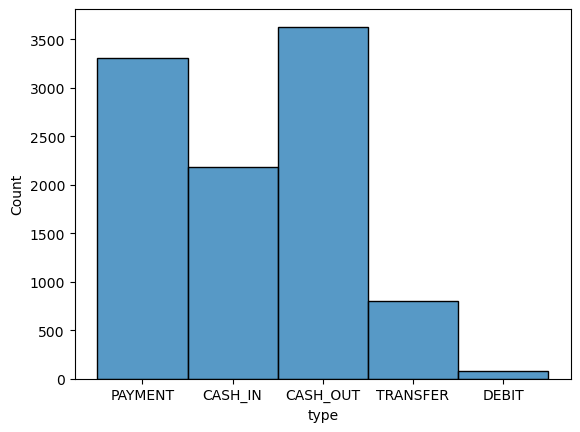

In [13]:
sns.histplot(data=Sample_df, x="type")

<Axes: xlabel='amount', ylabel='Count'>

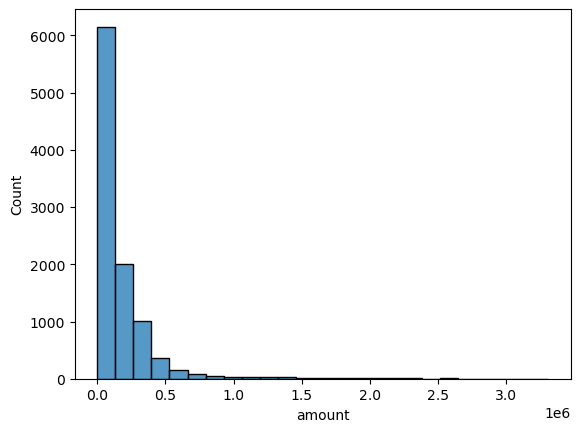

In [14]:
sns.histplot(data=Sample_df, x="amount", bins = 25)

<Axes: xlabel='oldbalanceOrg', ylabel='Count'>

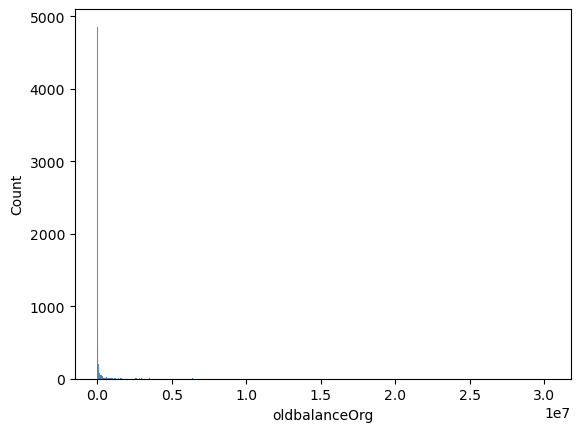

In [15]:
sns.histplot(data=Sample_df, x="oldbalanceOrg")

<Axes: xlabel='newbalanceOrig', ylabel='Count'>

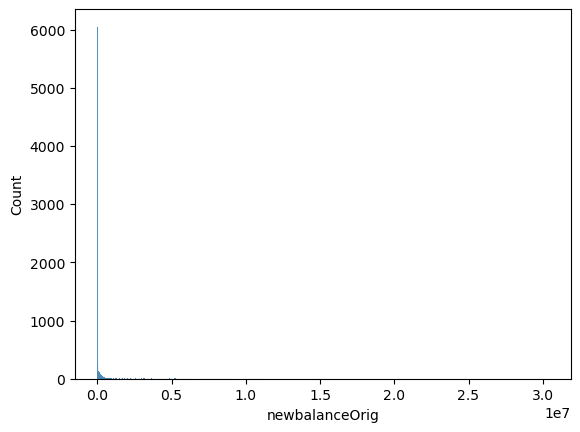

In [16]:
sns.histplot(data=Sample_df, x="newbalanceOrig")

In [17]:
#Visualizing unique values in the type columns
type_counts = Sample_df.value_counts("type")
type_counts

type
CASH_OUT    3628
PAYMENT     3307
CASH_IN     2184
TRANSFER     803
DEBIT         78
Name: count, dtype: int64

<Axes: xlabel='type'>

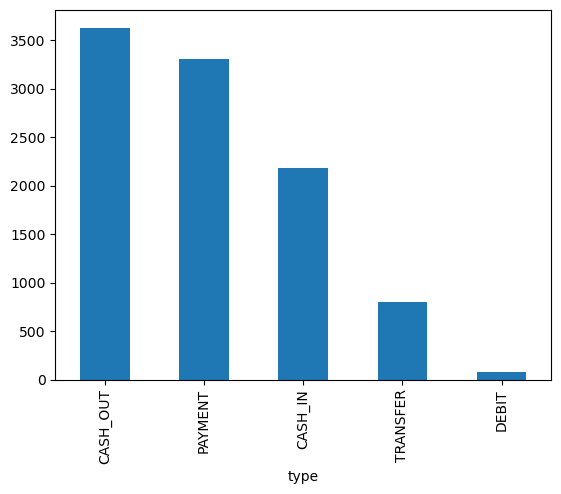

In [18]:
type_counts.plot.bar()

In [19]:
#Visualizing unique values in the isFlaggedFraud column
isFlaggedFraud_counts = Sample_df.value_counts("isFlaggedFraud")
isFlaggedFraud_counts

isFlaggedFraud
0    10000
Name: count, dtype: int64

<Axes: xlabel='isFlaggedFraud'>

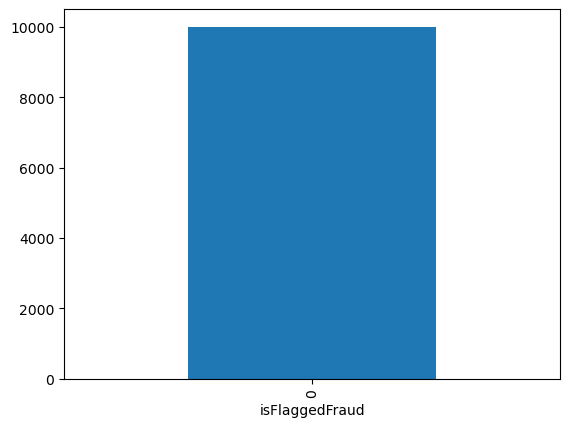

In [20]:
isFlaggedFraud_counts.plot.bar()

In [21]:
#Visualizing unique values in the isFraud column, which is the target
isFraud_counts = Sample_df.value_counts("isFraud")
isFraud_counts

isFraud
0    9994
1       6
Name: count, dtype: int64

<Axes: xlabel='isFraud'>

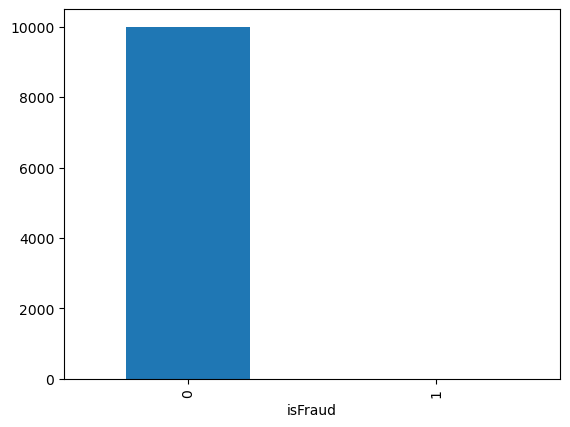

In [22]:
isFraud_counts.plot.bar()

Out of the 10,000 rows in our sample, only 6 were actaully fradulent transactions. This represents a strong class imbalance because a majority of transactions are genuine

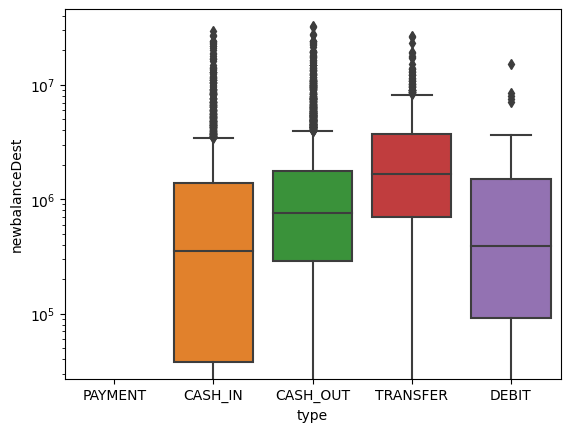

In [23]:
sns.boxplot(data=Sample_df, x="type", y="newbalanceDest")
plt.yscale("log")
plt.show()

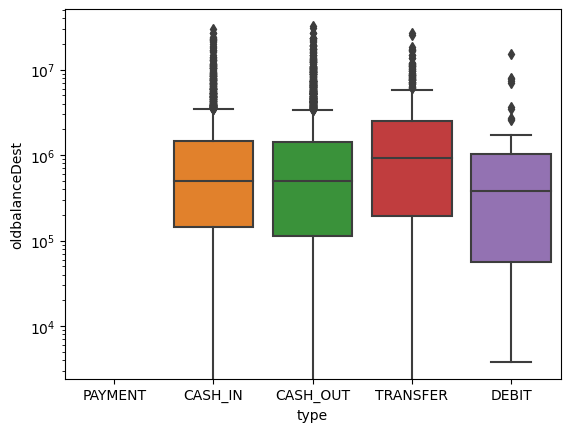

In [24]:
sns.boxplot(data=Sample_df, x="type", y="oldbalanceDest")
plt.yscale("log")
plt.show()

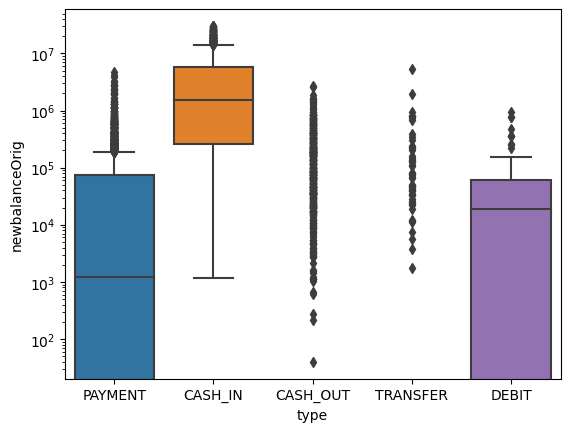

In [25]:
sns.boxplot(data=Sample_df, x="type", y="newbalanceOrig")
plt.yscale("log")
plt.show()

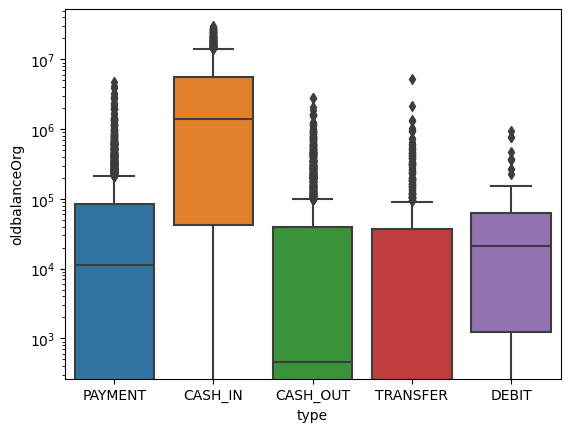

In [26]:
sns.boxplot(data=Sample_df, x="type", y="oldbalanceOrg")
plt.yscale("log")
plt.show()

c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
c:\Users\Goga\anaconda3\envs\phase1\lib\site-packages\seaborn\axisgrid.p

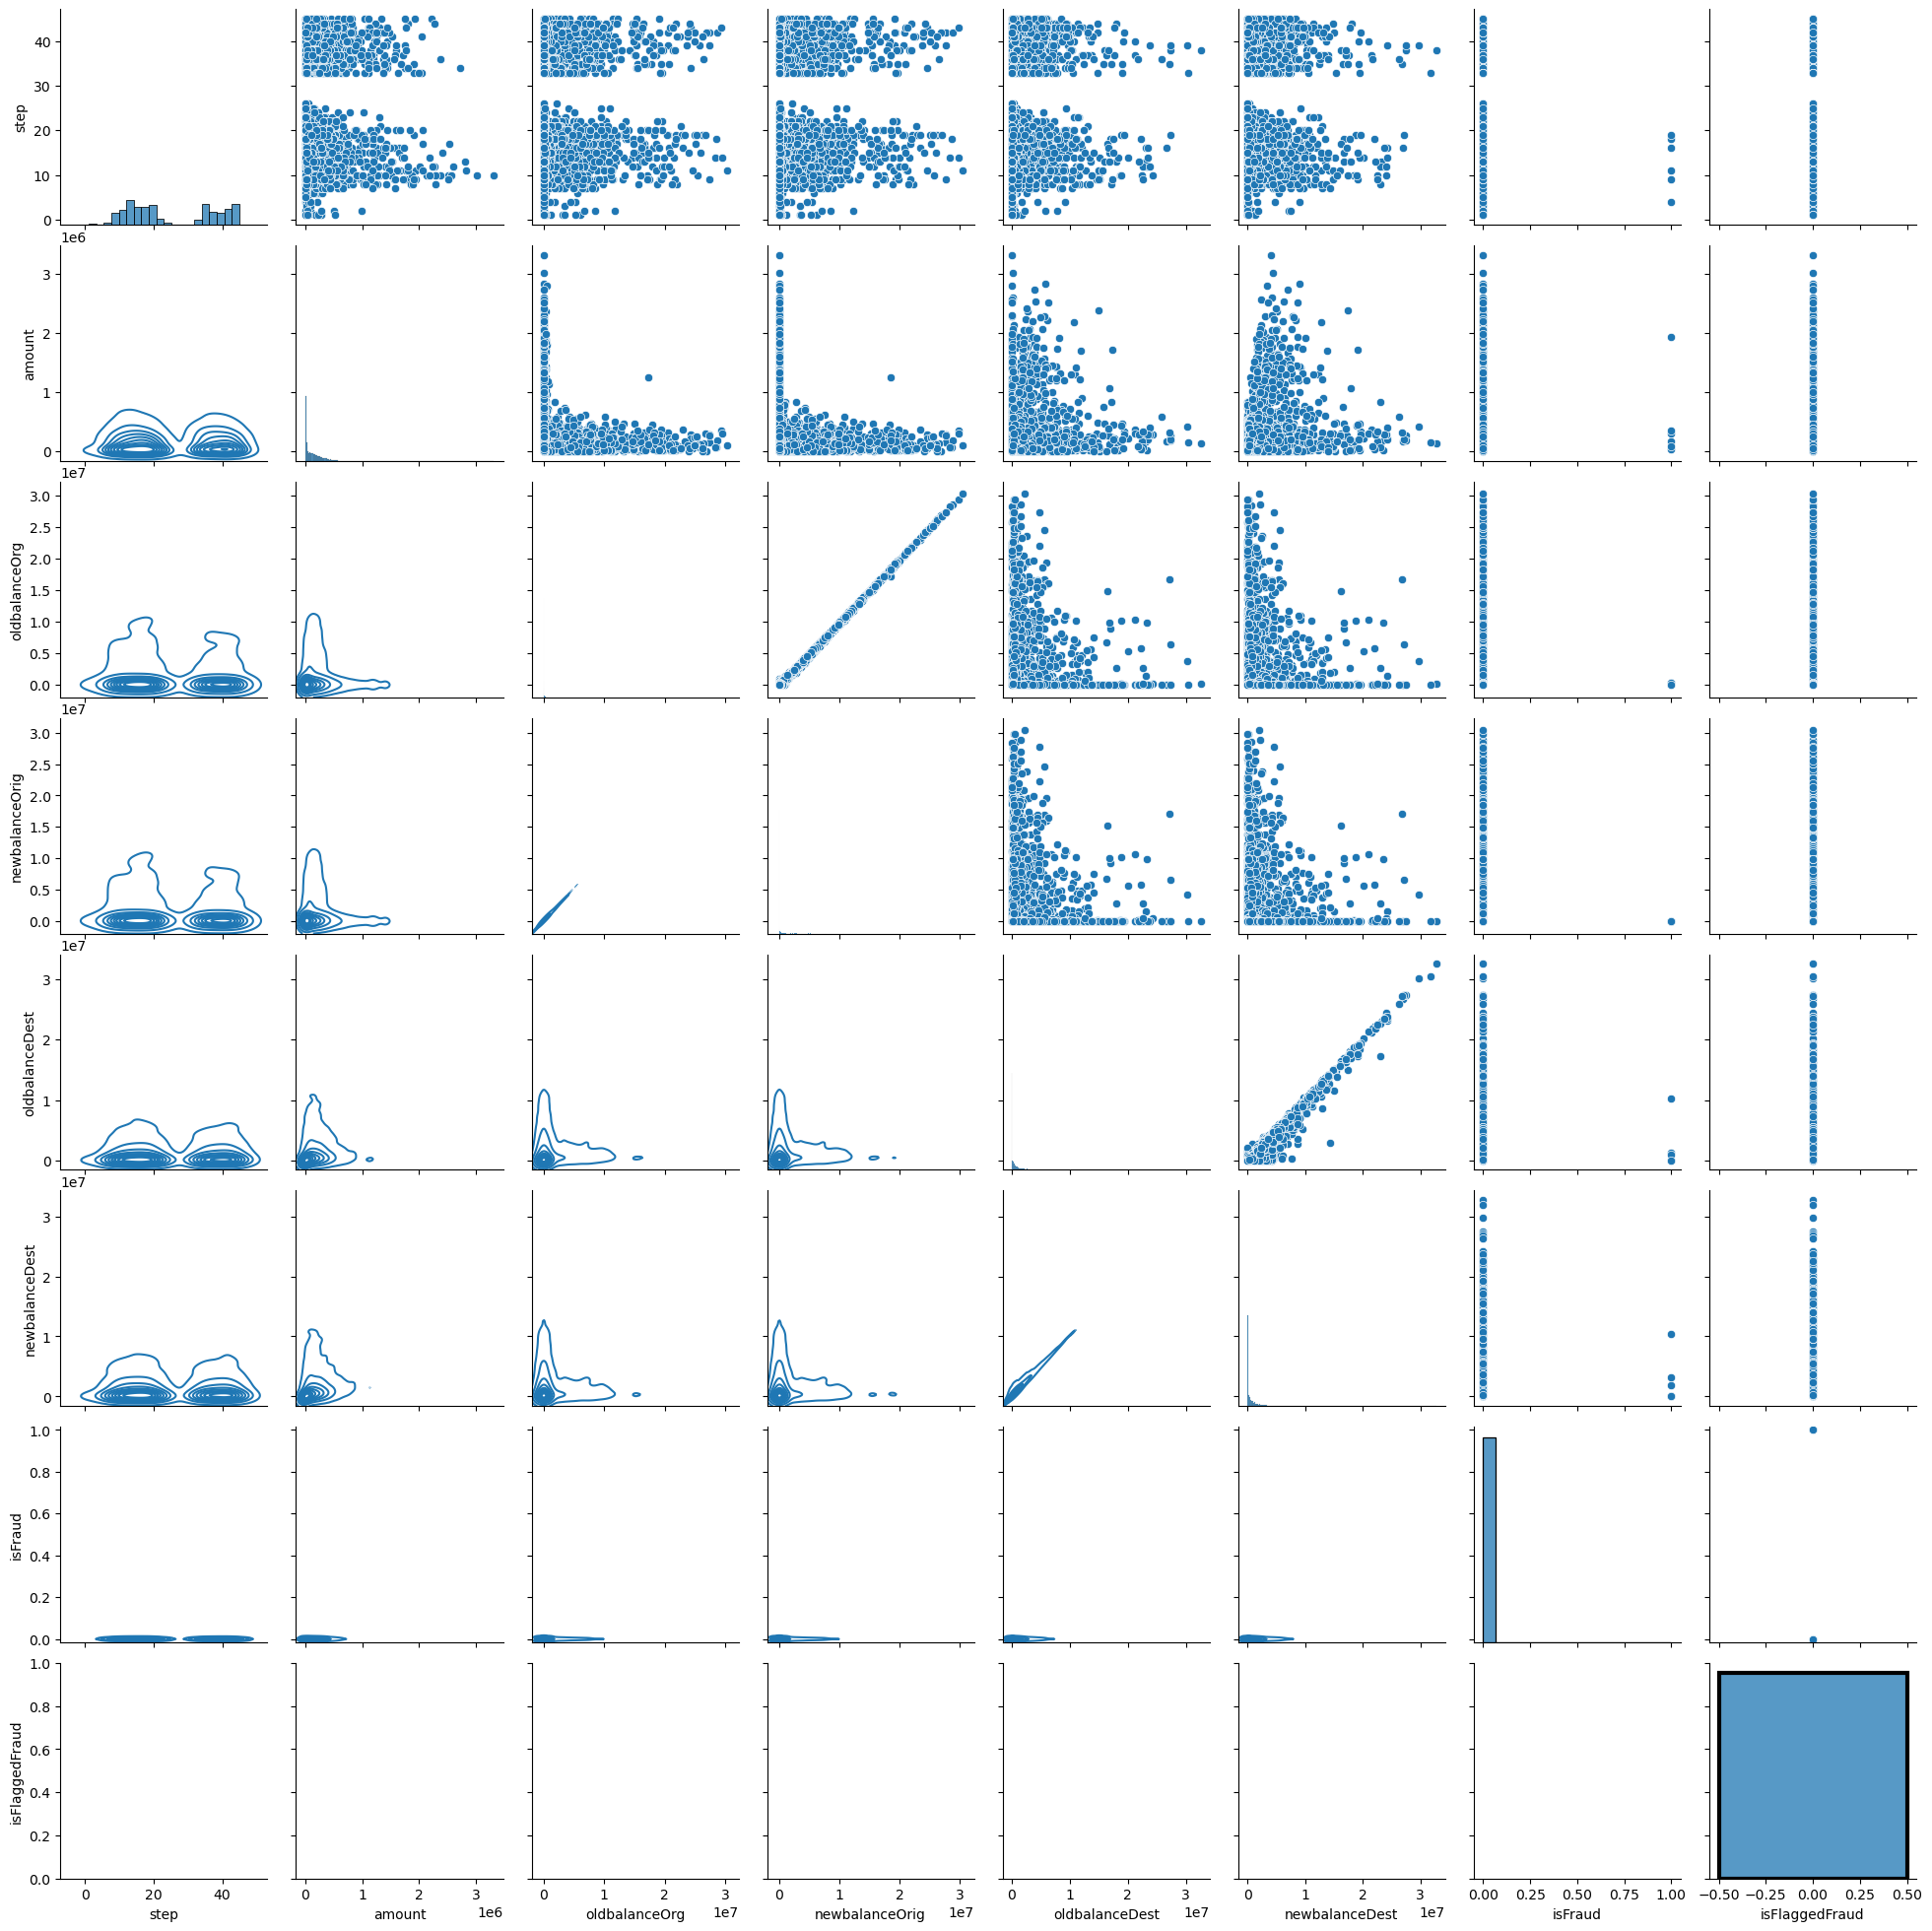

In [27]:
g = sns.PairGrid(Sample_df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, lw=3, legend=False)